**Final Project (29cm)** 
# 데이터 전처리 및 탐색

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_column', 1000)
pd.options.display.float_format = '{:.2f}'.format

import random
from tqdm.autonotebook import tqdm
import string
import re
plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

## 파일 불러오기

In [2]:
events = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_events.csv")
products = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_products.csv")
users = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_users.csv")

In [ ]:
# ad = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/ad.csv")
# advertiser = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/advertiser.csv")
# dataset = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/dataset.csv")
# impression_log = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/impression_log.csv")
# view_log = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/view_log.csv")
# viewer = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/viewer.csv")

In [3]:
#메모리 효율 위해 df 불러오기
df = pd.read_csv('/Users/greedy/Downloads/프로그래밍/FastCampus_29cm_FinalProject/category_edited')
RFM = pd.read_csv('/Users/greedy/Downloads/프로그래밍/FastCampus_29cm_FinalProject/RFM.csv')

In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)
RFM.drop(columns = 'Unnamed: 0', inplace = True)

## 데이터 살펴보기

In [ ]:
events.head()

In [ ]:
events.describe()

In [ ]:
events.info()

In [ ]:
events.isnull().sum()

In [ ]:
products.head()

In [ ]:
products.describe()

In [ ]:
products.info()

In [ ]:
users.head()

In [ ]:
users.describe()

In [ ]:
users.info()

## 데이터 users, products를 events에 병합

In [26]:
df = pd.merge(events, products, how = 'outer', on = 'item_no')

In [27]:
df = pd.merge(df, users, how = 'outer', on = 'user_no')

병합 데이터 확인

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
#컬럼 확인
df.columns

## 전처리

In [ ]:
import missingno
plt.figure(figsize=(20, 8))
missingno.matrix(df)

In [ ]:
df[df['brand_no'].isnull()]['category3_name']

In [ ]:
df[df['brand_name'].isnull()]

**브랜드 네임 없는 경우 대부분 홑이불**

## 브랜드 전처리

In [11]:
brand = df['brand_name'].unique()

In [12]:
brand = pd.DataFrame(brand)

In [13]:
brand.to_csv('brand.csv',encoding='utf-8-sig')

브랜드 이름 파악 후 '(,),_'으로 규칙적인 중복브랜드 제거

## 브랜드 이름 

In [ ]:
df_category = df[['session_id', 'item_no', 'category1_name', 'category2_name']]

In [ ]:
df_category.to_csv('df_category')

In [21]:
#이름 수정한 파일
name = pd.read_csv('/Users/greedy/Downloads/프로그래밍/FastCampus_29cm_FinalProject/renamed_sampled_products.csv')

In [22]:
name.drop(columns = 'Unnamed: 0', inplace = True)

In [17]:
#이름이 없던 경우 개별적인 검색으로 브랜드 확인 후 입력
null_item_list = df.loc[df['brand_name'].isnull(),['brand_name','item_name','category1_name','category2_name','category3_name','price']]
df.loc[null_item_list.query('category2_name == "주얼리"')['item_name'].index,['brand_name']]='null_'
df.loc[null_item_list.query('item_name == "[프리미엄침구] 시원한 시어서커/인견 여름이불 모음"')['item_name'].index,['brand_name']]='오르다'
df.loc[null_item_list.query('item_name == "EMF 전자파차단 침대 거실 프리미엄 전기요"')['item_name'].index,['brand_name']]='한스갤러리'
df.loc[null_item_list.query('item_name == "그린티 모이스트 파하 거즈 필링(30매)"')['item_name'].index,['brand_name']]='네오젠'
## 주얼리의 경우 브랜드 null 로 확인 브랜드 네임 null_로 변경

In [23]:
name = name[['item_no', 'new_name']]

In [28]:
df = pd.merge(df, name, how='left', on='item_no')

In [ ]:
#new_name 한스갤러리인 아이템
df[df['item_no']=='2BnrMYR3Tk0HuCCQh9TP2w==']
#  '5dSNvsYOSQYS9qa0ANtQvA==',
#  '69tL1qKgc0XIaMyTHS4ONg==',
#  'ID8z4rIuAqArc+ibb9Cwmw==',
#  'KBekYyL3M0T3e5V4qt0feQ==',
#  'MKPlUlNB5h//2dfkbVLwrA==',
#  'MRJ+bJ7V63wrspq2fAX5rg==',
#  'MX61jTuPfTuiduEPnmSMWQ==',
#  'NnUx3DncWlSapqeDfazJJg==',
#  'OqXb/XVgs05qCnuJ5tqgwQ==',
#  'PJYpnxNbruUsn8qiUhVCLw==',
#  'Rs2CQq8QE9Ux7slw7HzrsA==',
#  'Rt5Raf2UcBfi//4iMHisBQ==',
#  'oTxRag0b8AoYQFExwmia2Q==',
#  'qwhVZu67YVRcrrFgY4zuCw==',
#  'rS7CsnqbnNPaBJ5AsPusqw==',
#  'vg7v4TyFac+96m0gMdR+hg==',
#  'xg9+WhPqkY9/DQRX7SBE0w==',
#  'yWjNFgSbqCNdRC6geruokw==']

In [30]:
for i in df.loc[df['new_name'].isnull(),['brand_name']].index:
    df.loc[i,'new_name'] = df.loc[i,'brand_name']

In [31]:
df[df['brand_name']=='한스갤러리']

session_id             event_timestamp  \
9434     4c3c5ff54d089debe4cf09cca0fd7694  2021-06-12 17:36:42.697035   
15659    bdae6e1ce049f0241d4eb4d8e6b14935  2021-07-11 12:03:52.835036   
42413    99a14f85a31f2a4cbe0448016afad840  2021-07-08 03:16:46.131022   
42414    99a14f85a31f2a4cbe0448016afad840   2021-07-08 03:17:55.79203   
42465    31bec7ede53736ccdcaa71f194644563  2021-07-09 04:22:39.265222   
42466    31bec7ede53736ccdcaa71f194644563  2021-07-09 04:23:19.128235   
42467    31bec7ede53736ccdcaa71f194644563  2021-07-09 04:25:15.384256   
68577    4605344c8d3c8ca607cdcdcb93c28681  2021-06-08 00:51:31.404082   
68578    4605344c8d3c8ca607cdcdcb93c28681  2021-06-08 00:51:51.054089   
68579    4605344c8d3c8ca607cdcdcb93c28681   2021-06-08 00:51:51.06209   
92023    68f1ef463b56bce0f4007e66f2fd5418  2021-07-23 23:32:48.944094   
92048    68f1ef463b56bce0f4007e66f2fd5418  2021-07-23 23:32:31.060078   
92097    68f1ef463b56bce0f4007e66f2fd5418  2021-07-23 23:31:21.781029   
103847   fdc5c9a1d143b0529c0e522079ec789e  2021-06-30 15:35:43.645298   
105844   e41404b50acc10ebde84806b915b24f4  2021-08-02 13:33:38.595046   
105845   e41404b50acc10ebde84806b915b24f4   2021-08-02 13:59:57.64915   
106381   9e19dfd6b57d040688a648c0dba0d590  2021-06-13 08:57:47.696042   
106382   9e19dfd6b57d040688a648c0dba0d590  2021-06-13 08:57:47.709043   
107024   f7da0b34942c5d43e877b507b336a011   2021-07-26 20:45:30.28107   
107025   f7da0b34942c5d43e877b507b336a011  2021-07-26 20:46:54.727035   
107032   f7da0b34942c5d43e877b507b336a011    2021-07-26 19:50:20.5311   
107033   f7da0b34942c5d43e877b507b336a011  2021-07-26 20:38:20.441039   
107054   f7da0b34942c5d43e877b507b336a011  2021-07-26 19:48:45.762079   
107055   f7da0b34942c5d43e877b507b336a011  2021-07-26 19:49:54.514031   
107063   f7da0b34942c5d43e877b507b336a011  2021-07-26 20:04:37.021076   
107089   f7da0b34942c5d43e877b507b336a011  2021-07-26 19:46:37.127068   
107090   f7da0b34942c5d43e877b507b336a011  2021-07-26 19:47:56.330025   
107098   f7da0b34942c5d43e877b507b336a011   2021-07-26 20:43:07.72103   
107104   f7da0b34942c5d43e877b507b336a011  2021-07-26 20:43:13.195033   
107108   f7da0b34942c5d43e877b507b336a011  2021-07-26 20:04:47.937079   
143979   83f3dd053ea030f23e91df313d65eb81  2021-06-08 18:17:25.846245   
161762   778e5363bcd33d33d8d89786cfae0488  2021-07-27 14:01:41.818008   
222998   1f887fce1d74d99e3b1f75e843e5795f  2021-06-04 01:39:19.156177   
229126   a8823589ed181d23bf38272794e04eaa   2021-07-21 10:52:03.35304   
229127   3684c9c1d00b94cdae0e028d03682dba  2021-07-25 09:54:38.874135   
229128   783883ec878193a5fb23cea30811071f  2021-08-04 12:46:22.879021   
229141   6b03d970b0eff9a484bb8c5c723d4a26  2021-07-21 19:11:21.532164   
235661   3af29da11035ea431cd27b81917d34ab  2021-06-04 13:35:37.123269   
304736   31f00720ae532ac0edd37818a2797318  2021-07-09 01:08:19.466253   
305182   0dfc18e73bc893115d651d0f7745e9d9  2021-08-01 01:47:44.531067   
305277   31f00720ae532ac0edd37818a2797318   2021-07-09 00:28:29.77221   
305319   655f12f8f5db57ae2785a7d6c75395ae  2021-07-12 20:58:14.167149   
309074   d651a097fb8721f00cae86263b6f2afd   2021-07-05 08:39:33.05407   
311017   13ce5016624156f2ace90fdd465f8f39  2021-07-12 18:40:34.302043   
325414   2aec948a6c9ef7ff74256814524d56c0  2021-06-10 17:36:11.840004   
384145   d80829151a13adf683f55d214c99b741  2021-07-18 21:50:25.713013   
405272   151f8e32b45a2667b67dad2aca36e3b6   2021-07-20 05:11:40.92603   
405273   947b50b7bd77dc29b5e4e12e5dfe387c  2021-07-20 05:52:27.145032   
405318   61df3bfab711ade09cdb83b98023af26  2021-07-12 14:47:54.726021   
443598   0bb8d9523cc94850885e224ca9441b0f  2021-07-27 09:09:40.595052   
443599   0bb8d9523cc94850885e224ca9441b0f  2021-07-27 09:08:37.264038   
443604   ac1ea2368140a9e619c45c9595c90983  2021-06-21 15:21:33.231032   
443605   ac1ea2368140a9e619c45c9595c90983  2021-06-21 15:21:56.850034   
443606   ac1ea2368140a9e619c45c9595c90983  2021-06-21 15:22:59.058041   
443609   3f63da4

In [32]:
df.loc[null_item_list.query('item_name == "EMF 전자파차단 침대 거실 프리미엄 전기요"')['item_name'].index,['brand_name']]='한스갤러리'

## 카테고리 오분류

In [37]:
category1 = df['category1_name'].unique()

In [ ]:
#category1 하위 category2
for i in category1:
    print(i, df[df['category1_name']==i]['category2_name'].unique())

### 카테고리 2의 경우 들어맞음, 애매한 경우 데이터 확인 후 처리

In [ ]:
스포츠 = df[df['category1_name']== '스포츠/레저']

In [ ]:
스포츠[스포츠['category2_name']=='상의']['item_name'].unique()

In [ ]:
식품[식품['category2_name']=='상의']['item_name'].unique()

In [ ]:
가구 = df[df['category1_name']== '가구/인테리어']

In [ ]:
가구[가구['category2_name']=='신발']['item_name'].unique()

In [ ]:
가구[가구['category2_name']=='모자']['item_name'].unique()

In [ ]:
반려 = df[df['category1_name']== '반려동물']

In [ ]:
반려[반려['category2_name']=='가방']['item_name'].unique()

In [ ]:
category1

In [ ]:
category2 = df['category2_name'].unique()

In [ ]:
category2

In [ ]:
for i in category2:
    print(i, df[df['category2_name']==i]['category3_name'].unique(), '\n')

정성적으로 카테고리 재분류

In [ ]:
a = set(['인테리어소품','주방용품','신발','패션소품','주얼리','가공식품','침구단품','문구/사무용품','뷰티소품','침실가구','휴대폰 악세서리'
,'상의','이미용가전','아우터','헬스','하의','주방용품','헤어케어','홈데코','침구단품’,가방','주방가전','컴퓨터/태블릿,주변기기','신발','아우터'
,'양말','주얼리','상의','라운지웨어','헤어케어','하의','계절가전','모자','휴대폰 악세서리','원피스/점프수트'
,'상의','이미용가전','아우터','하의','신발','캠핑','가방','침실가구','원피스/점프수트','공학기기/용품','침구단품','주방용품','지갑','향수','스킨케어','양말'
,'신발','가방','하의','침구단품','아우터','언더웨어','스윔웨어','상의','주얼리','인테리어소품','휴대폰 악세서리','의류/잡화'
,'주방용품','주얼리','카페트/러그','아우터','생활용품','서재/사무용가구','원피스/점프수트','생활가전','라운지웨어','지갑''상의','신발','가방','하의'
,'상의','가방','하의','테크/가젯','아우터','신발','주방용품','색조메이크업','침구세트','휴대폰 악세서리','클렌징','스킨케어','생활용품','주방가전'
,'침구단품','헤어케어','주방용품','아우터','지갑','주얼리','스포츠웨어','생활가전','선케어'
,'언더웨어','패션소품','지갑','원피스/점프수트','신발','여행','생활가전'
,'침실가구','모자','문구/사무용품','휴대폰 악세서리','주방용품','주얼리','아우터','커튼/블라인드','이미용가전'
,'향수','수납가구','인테리어소품','가방','베이스메이크업','하의','상의'
,'가방','생활용품','아우터','하의','주얼리','지갑','신발','음료','노트북,악세서리','침구단품','휴대폰 악세서리','스포츠웨어','문구/사무용품','원피스/점프수트','상의','주방용품','헬스'
,'헤어케어','건강측정용품','침구세트','아우터','주얼리','스킨케어','커튼/블라인드','상의','마스크/팩','욕실용품','신발','언더웨어','뷰티소품','인테리어소품','침구단품','헬스','하의','지갑','휴대폰 악세서리'])

In [ ]:
a

In [38]:
#틀린 category 딕셔너리화
dic = {'가공식품' : '식품', '건강측정용품' : '생활/건강', '계절가전' : '디지털/가전', '공학기기/용품' : '디지털/가전', '노트북악세서리' : '디지털/가전', '라운지웨어' : '의류', '마스크/팩' : '화장품/미용', '문구/사무용품' : '생활/건강', '베이스메이크업' : '화장품/미용', '뷰티소품' : '화장품/미용', '색조메이크업' : '화장품/미용', '생활가전' : '디지털/가전', '생활용품' : '생활/건강', '서재/사무용가구' : '가구/인테리어', '선케어' : '화장품/미용', '수납가구' : '가구/인테리어', '스킨케어' : '화장품/미용', '언더웨어' : '의류', '욕실용품' : '생활/건강', '원피스/점프수트' : '의류', '음료' : '식품', '의류/잡화' : '반려동물', '이미용가전' : '디지털/가전', '인테리어소품' : '가구/인테리어', '주방가전' : '디지털/가전', '주방용품' : '생활/건강', '지갑' : '잡화', '침구단품' : '가구/인테리어', '침구세트' : '가구/인테리어', '침실가구' : '가구/인테리어', '카페트/러그' : '가구/인테리어', '캠핑' : '스포츠/레저', '커튼/블라인드' : '가구/인테리어', '컴퓨터/태블릿 주변기기' : '디지털/가전', '클렌징' : '화장품/미용', '테크/가젯' : '디지털/가전', '패션소품' : '잡화', '향수' : '화장품/미용', '헤어케어' : '화장품/미용', '헬스' : '스포츠/레저', '홈데코' : '가구/인테리어', '휴대폰 악세서리' : '디지털/가전'}

In [39]:
for key, value in dic.items():
    df.loc[df['category2_name']==key, 'category1_name'] = value

In [40]:
#확인
df[df['category2_name']=='지갑']['category1_name'].unique()

array(['잡화'], dtype=object)

In [ ]:
df[df['category1_name']=='의류']['category2_name'].unique()

In [41]:
#kids에 속하는 게 맞는 경우는 키즈로 
kids = {'가방':'잡화', '하의':'의류','주얼리':'잡화','스포츠웨어':'의류','신발':'잡화','아우터':'의류','양말':'잡화','스윔웨어':'의류','상의':'의류','모자':'잡화'}

In [42]:
df[df['category1_name']=='키즈']

session_id             event_timestamp  \
710      0364bd2ae20b846f3bee08d205958c49     2021-07-02 09:49:13.054   
1157     1cf4a4d9af8a6ea5926d261b869c7247  2021-07-06 00:52:15.858036   
3128     6ac2cd6eac699ee8f44f1de654b41dd6  2021-07-03 20:18:47.348027   
3129     6ac2cd6eac699ee8f44f1de654b41dd6  2021-07-03 20:19:03.747039   
3428     a7290c5bd7bc2aaa7ea2b6c957ef639b  2021-06-27 20:45:27.546012   
...                                   ...                         ...   
5875271  7dd43a0ec2ecb00222e1d7dd758eb2bd  2021-08-04 11:26:47.298029   
5875288  8e4e68f6068682d1e76549126c494b53  2021-07-13 10:51:26.536035   
5877184  21ddddaa7937eb8570061140d3f47822  2021-07-20 15:01:48.605034   
5877749  641ddf322eab9074dfc103ca0612d579     2021-08-02 19:21:44.846   
5878948  d548ba320f85a0f81a65036c5670eca3  2021-07-28 15:27:45.162031   

               event_name                   user_no                   item_no  \
710            click_item  RloGe2gsmpY/TBz3sHSaYQ==  R8ouliy5K8l1lhtT1iJ7Ew==   
1157           click_item  kb+ttbIEcw0NtbJgSJ0Nhw==  JDLjqsrqEcCKus1vQhlY1w==   
3128           click_item  zip7sY1W2bpbwQS2Zy5mbQ==  IlDKWOBVrN8Kn1/ne3yo3Q==   
3129           click_item  zip7sY1W2bpbwQS2Zy5mbQ==  IlDKWOBVrN8Kn1/ne3yo3Q==   
3428           click_item  /MF0yodKaoldjAtotEvmcA==  d7uwYBR6EYR5YGm1kAcHtw==   
...                   ...                       ...                       ...   
5875271  purchase_success  X8frlT/lNLuvOgHFeTFtGg==  HVWccS9W/FeE6IpuomPy1g==   
5875288        click_item  c2VI9kgV92nLXyCleyIChw==  zzFrB1DLDABLVI3Vb+uq5Q==   
5877184        click_item  DvPpjJaWUNwrJu7fYchO4w==  +N0m+/DvlwUk6eaFVJ/MbQ==   
5877749        click_item  HpppKrsPuaC6CT8UZy9wbA==  bt9Kix1tzbgQfn7ZhyJdOQ==   
5878948        click_item  wJHH4MC2IjKsB5UjLhyLzw==  TwI6JDykhJ1qoGaLWWec1g==   

        device_type mobile_brand_name mobile_model_name mobile_marketing_name  \
710          mobile             Apple         iPhone XR                   NaN   
1157         mobile             Apple            iPhone                   NaN   
3128         mobile             Apple            iPhone                   NaN   
3129         mobile             Apple            iPhone                   NaN   
3428         mobile             Apple         iPhone XR                   NaN   
...             ...               ...               ...                   ...   
5875271      mobile           Samsung          SM-G991B         Galaxy S21 5G   
5875288      mobile             Apple          iPhone 7                   NaN   
5877184      mobile             Apple            iPhone                   NaN   
5877749      mobile             Apple          iPhone 8                   NaN   
5878948      mobile             Apple         iPhone XR                   NaN   

        operating_system_version      country        region platform  \
710                     iOS 14.6  South Korea         Seoul      IOS   
1157                    iOS 14.6  South Korea         Seoul      IOS   
3128                    iOS 14.6  South Korea   Gyeonggi-do      IOS   
3129                    iOS 14.6  South Korea   Gyeonggi-do      IOS   
3428                    iOS 14.6  South Korea   Gyeonggi-do      IOS   
...                          ...          ...           ...      ...   
5875271               Android 11  South Korea         Seoul  ANDROID   
5875288               iOS 14.4.2  South Korea         Seoul      IOS   
5877184                 iOS 14.6  South Korea         Busan      IOS   
5877749                 iOS 14.6  South Korea  Jeollabuk-do      IOS   
5878948               iOS 14.4.1  South Korea         Seoul      IOS   

                                               item_name  \
710               빅토리아슈즈 키즈 벨크로 메르세데스 로나 (102706-BLANCO)   
1157               LAYERED FLARED TROUSERS (SATIN BLACK)   
3128                                    콜맨 위드 아동 슬리퍼 클로그   
3129                                    콜맨 위드 아동 슬리퍼 클로그   
3428                          크록스 크록밴드 클로그 

In [43]:
for key, value in kids.items():
    df.loc[(df['category2_name']==key) & (df['category1_name']!='키즈'), 'category1_name'] = value

In [44]:
#키즈 이터 확인
df[df['category1_name']=='키즈']

session_id             event_timestamp  \
710      0364bd2ae20b846f3bee08d205958c49     2021-07-02 09:49:13.054   
1157     1cf4a4d9af8a6ea5926d261b869c7247  2021-07-06 00:52:15.858036   
3128     6ac2cd6eac699ee8f44f1de654b41dd6  2021-07-03 20:18:47.348027   
3129     6ac2cd6eac699ee8f44f1de654b41dd6  2021-07-03 20:19:03.747039   
3428     a7290c5bd7bc2aaa7ea2b6c957ef639b  2021-06-27 20:45:27.546012   
...                                   ...                         ...   
5875271  7dd43a0ec2ecb00222e1d7dd758eb2bd  2021-08-04 11:26:47.298029   
5875288  8e4e68f6068682d1e76549126c494b53  2021-07-13 10:51:26.536035   
5877184  21ddddaa7937eb8570061140d3f47822  2021-07-20 15:01:48.605034   
5877749  641ddf322eab9074dfc103ca0612d579     2021-08-02 19:21:44.846   
5878948  d548ba320f85a0f81a65036c5670eca3  2021-07-28 15:27:45.162031   

               event_name                   user_no                   item_no  \
710            click_item  RloGe2gsmpY/TBz3sHSaYQ==  R8ouliy5K8l1lhtT1iJ7Ew==   
1157           click_item  kb+ttbIEcw0NtbJgSJ0Nhw==  JDLjqsrqEcCKus1vQhlY1w==   
3128           click_item  zip7sY1W2bpbwQS2Zy5mbQ==  IlDKWOBVrN8Kn1/ne3yo3Q==   
3129           click_item  zip7sY1W2bpbwQS2Zy5mbQ==  IlDKWOBVrN8Kn1/ne3yo3Q==   
3428           click_item  /MF0yodKaoldjAtotEvmcA==  d7uwYBR6EYR5YGm1kAcHtw==   
...                   ...                       ...                       ...   
5875271  purchase_success  X8frlT/lNLuvOgHFeTFtGg==  HVWccS9W/FeE6IpuomPy1g==   
5875288        click_item  c2VI9kgV92nLXyCleyIChw==  zzFrB1DLDABLVI3Vb+uq5Q==   
5877184        click_item  DvPpjJaWUNwrJu7fYchO4w==  +N0m+/DvlwUk6eaFVJ/MbQ==   
5877749        click_item  HpppKrsPuaC6CT8UZy9wbA==  bt9Kix1tzbgQfn7ZhyJdOQ==   
5878948        click_item  wJHH4MC2IjKsB5UjLhyLzw==  TwI6JDykhJ1qoGaLWWec1g==   

        device_type mobile_brand_name mobile_model_name mobile_marketing_name  \
710          mobile             Apple         iPhone XR                   NaN   
1157         mobile             Apple            iPhone                   NaN   
3128         mobile             Apple            iPhone                   NaN   
3129         mobile             Apple            iPhone                   NaN   
3428         mobile             Apple         iPhone XR                   NaN   
...             ...               ...               ...                   ...   
5875271      mobile           Samsung          SM-G991B         Galaxy S21 5G   
5875288      mobile             Apple          iPhone 7                   NaN   
5877184      mobile             Apple            iPhone                   NaN   
5877749      mobile             Apple          iPhone 8                   NaN   
5878948      mobile             Apple         iPhone XR                   NaN   

        operating_system_version      country        region platform  \
710                     iOS 14.6  South Korea         Seoul      IOS   
1157                    iOS 14.6  South Korea         Seoul      IOS   
3128                    iOS 14.6  South Korea   Gyeonggi-do      IOS   
3129                    iOS 14.6  South Korea   Gyeonggi-do      IOS   
3428                    iOS 14.6  South Korea   Gyeonggi-do      IOS   
...                          ...          ...           ...      ...   
5875271               Android 11  South Korea         Seoul  ANDROID   
5875288               iOS 14.4.2  South Korea         Seoul      IOS   
5877184                 iOS 14.6  South Korea         Busan      IOS   
5877749                 iOS 14.6  South Korea  Jeollabuk-do      IOS   
5878948               iOS 14.4.1  South Korea         Seoul      IOS   

                                               item_name  \
710               빅토리아슈즈 키즈 벨크로 메르세데스 로나 (102706-BLANCO)   
1157               LAYERED FLARED TROUSERS (SATIN BLACK)   
3128                                    콜맨 위드 아동 슬리퍼 클로그   
3129                                    콜맨 위드 아동 슬리퍼 클로그   
3428                          크록스 크록밴드 클로그 

In [ ]:
#새 데이터 파일
df.to_csv('category_edited')

## Birth_date 시간 처리

In [45]:
#8888,9999, null 등의 데이터 nat로 사용
df['birth_date'] = pd.to_datetime(df['birth_date'], errors = 'coerce')

In [47]:
#생일 없는 경우
df['birth_date'].isnull().sum()

335636

In [48]:
def convert_datetime(row):
    if pd.isnull(row):
        return np.nan
    else:
        return pd.to_datetime(row)

In [49]:
df['birth_date'] = df['birth_date'].apply(convert_datetime)

In [ ]:
#df csv화
df.to_csv('df.csv')

In [50]:
df['birth_date'].describe()

count                 5544771
unique                  15790
top       1978-01-23 00:00:00
freq                     8041
first     1923-12-12 00:00:00
last      2017-07-17 00:00:00
Name: birth_date, dtype: object

### Users 성별

In [52]:
df['gender'].value_counts()

F    4376513
M     839641
Name: gender, dtype: int64

여성 회원 다수

## 데이터 EDA

### Products 카테고리

In [53]:
df_category = df.groupby(['category1_name'])['session_id'].count().sort_values(ascending=False).\
reset_index()

#비중
for i in range(len(df_category)):
    df_category['비중'] = df_category['session_id']/df_category['session_id'].sum() * 100

df_category

category1_name  session_id    비중
0              의류     3575653 60.81
1              잡화     1485785 25.27
2           생활/건강      266064  4.52
3         가구/인테리어      209617  3.56
4          디지털/가전      136537  2.32
5          화장품/미용       72953  1.24
6          스포츠/레저       43312  0.74
7              식품       43150  0.73
8              컬처       27456  0.47
9              키즈       10706  0.18
10           반려동물        8853  0.15
11          홈_OLD         238  0.00
12           성년의날          35  0.00
13       패션잡화_OLD          27  0.00
14     라이프스타일_OLD          14  0.00
15         뷰티_OLD           4  0.00
16       여성패션_OLD           3  0.00

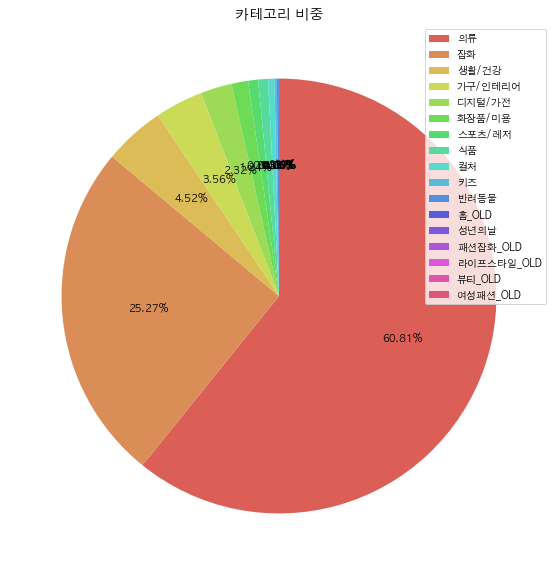

In [54]:
colors = sns.color_palette('hls', len(df_category['category1_name'])) 

fig = plt.figure(figsize=(10, 10)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
 
pie = ax.pie(df_category['비중'], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors
       )
plt.title('카테고리 비중', fontsize=14)
plt.legend(pie[0], df_category['category1_name']) 

### 코호트 분석

https://workingwithpython.com/pythoncohortanalysis/

In [55]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df.head()

session_id            event_timestamp   event_name  \
0  c47e93742387750baba2e238558fa12d 2021-06-03 13:00:01.845000   click_item   
1  c47e93742387750baba2e238558fa12d 2021-06-03 13:00:47.511013   click_item   
2  c47e93742387750baba2e238558fa12d 2021-06-03 13:02:21.636026   click_item   
3  c47e93742387750baba2e238558fa12d 2021-06-03 13:02:58.306042   click_item   
4  f1b035b71ef5f8e1e7c1d6c0c5032faa 2021-06-10 12:15:42.476001  add_to_cart   

                    user_no                   item_no device_type  \
0  +9eODQMZ8YgXQZJJAo56nw==  4KwsZkXDulM0oQ2sTVSlYQ==      mobile   
1  +9eODQMZ8YgXQZJJAo56nw==  seELIO8ssL85o/yMQpkKNw==      mobile   
2  +9eODQMZ8YgXQZJJAo56nw==  AQNsEUBqxMy99Mk6odfWTA==      mobile   
3  +9eODQMZ8YgXQZJJAo56nw==  DfYgpxfLCWwF+gyEmAjGkA==      mobile   
4  +9eODQMZ8YgXQZJJAo56nw==  1/60mbjEzf3sI/52/d9lQA==      mobile   

  mobile_brand_name mobile_model_name mobile_marketing_name  \
0           Samsung          SM-N960N          Galaxy Note9   
1           Samsung          SM-N960N          Galaxy Note9   
2           Samsung          SM-N960N          Galaxy Note9   
3           Samsung          SM-N960N          Galaxy Note9   
4           Samsung          SM-N960N          Galaxy Note9   

  operating_system_version      country       region platform  \
0               Android 10  South Korea  Gyeonggi-do  ANDROID   
1               Android 10  South Korea  Gyeonggi-do  ANDROID   
2               Android 10  South Korea  Gyeonggi-do  ANDROID   
3               Android 10  South Korea  Gyeonggi-do  ANDROID   
4               Android 10  South Korea  Gyeonggi-do  ANDROID   

                            item_name                        image_name  \
0                     남성) 코튼 리넨 이지 쇼츠  ecb06f34b6d8c4c521221aebbcc0e934   
1                        남성) 코튼 이지 쇼츠  13551f740ecacbcce3baf5e232f0fb9b   
2                        남성) 치노 밴딩 팬츠  569712813f195e07974c740aeb70f7b2   
3                   남성) 쿨터치 사이드밴드 슬랙스  54df4e65f4b1dfe66273203fbd3c8d23   
4  [Laslow] SeasonUnit Sigma F (남여공용)  3cd917571a5f2a26eb01587d0276227a   

     price  category1_code category1_name  category2_code category2_name  \
0 29900.00       243100100             의류       243104100             하의   
1 19900.00       243100100             의류       243104100             하의   
2 39900.00       243100100             의류       243104100             하의   
3 49900.00       243100100             의류       243102100             상의   
4 65000.00       244100100             잡화       244101100             신발   

   category3_code category3_name  brand_no brand_name birth_date gender  \
0       243104101             바지  13901.00     TOPTEN 1969-04-05      F   
1       243104101             바지  13901.00     TOPTEN 1969-04-05      F   
2       243104101             바지  13901.00     TOPTEN 1969-04-05      F   
3       243102103            티셔츠  13901.00     TOPTEN 1969-04-05      F   
4       244101112            슬리퍼  11481.00     LASLOW 1969-04-05      F   

  new_name  
0   TOPTEN  
1   TOPTEN  
2   TOPTEN  
3   TOPTEN  
4   LASLOW

In [56]:
df['event_timestamp'] = df['event_timestamp'].dt.strftime('%y/%m/%d')

In [57]:
df.head()

session_id event_timestamp   event_name  \
0  c47e93742387750baba2e238558fa12d        21/06/03   click_item   
1  c47e93742387750baba2e238558fa12d        21/06/03   click_item   
2  c47e93742387750baba2e238558fa12d        21/06/03   click_item   
3  c47e93742387750baba2e238558fa12d        21/06/03   click_item   
4  f1b035b71ef5f8e1e7c1d6c0c5032faa        21/06/10  add_to_cart   

                    user_no                   item_no device_type  \
0  +9eODQMZ8YgXQZJJAo56nw==  4KwsZkXDulM0oQ2sTVSlYQ==      mobile   
1  +9eODQMZ8YgXQZJJAo56nw==  seELIO8ssL85o/yMQpkKNw==      mobile   
2  +9eODQMZ8YgXQZJJAo56nw==  AQNsEUBqxMy99Mk6odfWTA==      mobile   
3  +9eODQMZ8YgXQZJJAo56nw==  DfYgpxfLCWwF+gyEmAjGkA==      mobile   
4  +9eODQMZ8YgXQZJJAo56nw==  1/60mbjEzf3sI/52/d9lQA==      mobile   

  mobile_brand_name mobile_model_name mobile_marketing_name  \
0           Samsung          SM-N960N          Galaxy Note9   
1           Samsung          SM-N960N          Galaxy Note9   
2           Samsung          SM-N960N          Galaxy Note9   
3           Samsung          SM-N960N          Galaxy Note9   
4           Samsung          SM-N960N          Galaxy Note9   

  operating_system_version      country       region platform  \
0               Android 10  South Korea  Gyeonggi-do  ANDROID   
1               Android 10  South Korea  Gyeonggi-do  ANDROID   
2               Android 10  South Korea  Gyeonggi-do  ANDROID   
3               Android 10  South Korea  Gyeonggi-do  ANDROID   
4               Android 10  South Korea  Gyeonggi-do  ANDROID   

                            item_name                        image_name  \
0                     남성) 코튼 리넨 이지 쇼츠  ecb06f34b6d8c4c521221aebbcc0e934   
1                        남성) 코튼 이지 쇼츠  13551f740ecacbcce3baf5e232f0fb9b   
2                        남성) 치노 밴딩 팬츠  569712813f195e07974c740aeb70f7b2   
3                   남성) 쿨터치 사이드밴드 슬랙스  54df4e65f4b1dfe66273203fbd3c8d23   
4  [Laslow] SeasonUnit Sigma F (남여공용)  3cd917571a5f2a26eb01587d0276227a   

     price  category1_code category1_name  category2_code category2_name  \
0 29900.00       243100100             의류       243104100             하의   
1 19900.00       243100100             의류       243104100             하의   
2 39900.00       243100100             의류       243104100             하의   
3 49900.00       243100100             의류       243102100             상의   
4 65000.00       244100100             잡화       244101100             신발   

   category3_code category3_name  brand_no brand_name birth_date gender  \
0       243104101             바지  13901.00     TOPTEN 1969-04-05      F   
1       243104101             바지  13901.00     TOPTEN 1969-04-05      F   
2       243104101             바지  13901.00     TOPTEN 1969-04-05      F   
3       243102103            티셔츠  13901.00     TOPTEN 1969-04-05      F   
4       244101112            슬리퍼  11481.00     LASLOW 1969-04-05      F   

  new_name  
0   TOPTEN  
1   TOPTEN  
2   TOPTEN  
3   TOPTEN  
4   LASLOW

In [58]:
#유저 - 세션 - 타임스탬프 - 이벤트 네임 
CH = df[['user_no', 'session_id', 'event_timestamp', 'event_name']]
CH.head()

user_no                        session_id event_timestamp  \
0  +9eODQMZ8YgXQZJJAo56nw==  c47e93742387750baba2e238558fa12d        21/06/03   
1  +9eODQMZ8YgXQZJJAo56nw==  c47e93742387750baba2e238558fa12d        21/06/03   
2  +9eODQMZ8YgXQZJJAo56nw==  c47e93742387750baba2e238558fa12d        21/06/03   
3  +9eODQMZ8YgXQZJJAo56nw==  c47e93742387750baba2e238558fa12d        21/06/03   
4  +9eODQMZ8YgXQZJJAo56nw==  f1b035b71ef5f8e1e7c1d6c0c5032faa        21/06/10   

    event_name  
0   click_item  
1   click_item  
2   click_item  
3   click_item  
4  add_to_cart

In [59]:
FirstSession = CH.groupby('user_no')['event_timestamp'].min()
FirstSession.head()

user_no
+++T9c17sr6wEYOy9UFv3w==    21/06/15
+++aQH5NnhiU/9qECKk3uQ==    21/06/10
++0bwiYVJ/TAsCpxI4UCuw==    21/06/14
++1HN9s1imztN8ftPCt3LA==    21/06/10
++292nTvV+bCI1Diuw96GA==    21/07/08
Name: event_timestamp, dtype: object

In [61]:
CH.set_index('user_no', inplace = True)

In [62]:
CH['FirstSession']=FirstSession

In [63]:
CH

session_id event_timestamp  \
user_no                                                                      
+9eODQMZ8YgXQZJJAo56nw==  c47e93742387750baba2e238558fa12d        21/06/03   
+9eODQMZ8YgXQZJJAo56nw==  c47e93742387750baba2e238558fa12d        21/06/03   
+9eODQMZ8YgXQZJJAo56nw==  c47e93742387750baba2e238558fa12d        21/06/03   
+9eODQMZ8YgXQZJJAo56nw==  c47e93742387750baba2e238558fa12d        21/06/03   
+9eODQMZ8YgXQZJJAo56nw==  f1b035b71ef5f8e1e7c1d6c0c5032faa        21/06/10   
...                                                    ...             ...   
8okJXtYVKYoBoBAG823v2Q==  9034aefc59c787ca83bd15648e93ad3a        21/08/04   
Ve1mEjXwrBP8YHdtNyHKxQ==  f55358dd62645a35a43535b510b6139d        21/08/04   
vrE4nCVISqKLZ59f+eGRfA==  628dd6aff94d030bfd147b0519677b9c        21/08/04   
IRWUNThkMgQZobEJm8OG1w==  56e2a3ab0bb9aea66e64298170822ce1        21/08/04   
5rVv6fkSkHKnK/u8yTiIwQ==  346b3f761a783d704f28a831da64289d        21/08/04   

                                event_name FirstSession  
user_no                                                  
+9eODQMZ8YgXQZJJAo56nw==        click_item     21/06/03  
+9eODQMZ8YgXQZJJAo56nw==        click_item     21/06/03  
+9eODQMZ8YgXQZJJAo56nw==        click_item     21/06/03  
+9eODQMZ8YgXQZJJAo56nw==        click_item     21/06/03  
+9eODQMZ8YgXQZJJAo56nw==       add_to_cart     21/06/03  
...                                    ...          ...  
8okJXtYVKYoBoBAG823v2Q==  purchase_success     21/08/04  
Ve1mEjXwrBP8YHdtNyHKxQ==        click_item     21/08/04  
vrE4nCVISqKLZ59f+eGRfA==  purchase_success     21/08/04  
IRWUNThkMgQZobEJm8OG1w==        click_item     21/08/04  
5rVv6fkSkHKnK/u8yTiIwQ==        click_item     21/08/04  

[5880407 rows x 4 columns]

In [64]:
CH.reset_index(inplace = True)

In [65]:
grouped = CH.groupby(['FirstSession', 'event_timestamp'])

In [66]:
CH1 = grouped['user_no'].nunique()
CH1.head(10)

FirstSession  event_timestamp
21/06/03      21/06/03           11873
              21/06/04            3167
              21/06/05            2723
              21/06/06            2898
              21/06/07            3038
              21/06/08            2829
              21/06/09            2945
              21/06/10            2763
              21/06/11            2380
              21/06/12            2276
Name: user_no, dtype: int64

In [67]:
CH1.reset_index()

FirstSession event_timestamp  user_no
0        21/06/03        21/06/03    11873
1        21/06/03        21/06/04     3167
2        21/06/03        21/06/05     2723
3        21/06/03        21/06/06     2898
4        21/06/03        21/06/07     3038
...           ...             ...      ...
2011     21/08/02        21/08/03      191
2012     21/08/02        21/08/04       59
2013     21/08/03        21/08/03     1822
2014     21/08/03        21/08/04      116
2015     21/08/04        21/08/04      670

[2016 rows x 3 columns]

In [69]:
CH1

FirstSession event_timestamp  user_no
0        21/06/03        21/06/03    11873
1        21/06/03        21/06/04     3167
2        21/06/03        21/06/05     2723
3        21/06/03        21/06/06     2898
4        21/06/03        21/06/07     3038
...           ...             ...      ...
2011     21/08/02        21/08/03      191
2012     21/08/02        21/08/04       59
2013     21/08/03        21/08/03     1822
2014     21/08/03        21/08/04      116
2015     21/08/04        21/08/04      670

[2016 rows x 3 columns]

In [70]:
each_period=CH1['FirstSession'].value_counts().sort_index()
each_period

21/06/03    63
21/06/04    62
21/06/05    61
21/06/06    60
21/06/07    59
21/06/08    58
21/06/09    57
21/06/10    56
21/06/11    55
21/06/12    54
21/06/13    53
21/06/14    52
21/06/15    51
21/06/16    50
21/06/17    49
21/06/18    48
21/06/19    47
21/06/20    46
21/06/21    45
21/06/22    44
21/06/23    43
21/06/24    42
21/06/25    41
21/06/26    40
21/06/27    39
21/06/28    38
21/06/29    37
21/06/30    36
21/07/01    35
21/07/02    34
21/07/03    33
21/07/04    32
21/07/05    31
21/07/06    30
21/07/07    29
21/07/08    28
21/07/09    27
21/07/10    26
21/07/11    25
21/07/12    24
21/07/13    23
21/07/14    22
21/07/15    21
21/07/16    20
21/07/17    19
21/07/18    18
21/07/19    17
21/07/20    16
21/07/21    15
21/07/22    14
21/07/23    13
21/07/24    12
21/07/25    11
21/07/26    10
21/07/27     9
21/07/28     8
21/07/29     7
21/07/30     6
21/07/31     5
21/08/01     4
21/08/02     3
21/08/03     2
21/08/04     1
Name: FirstSession, dtype: int64

In [71]:
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

In [72]:
cohortperiod

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,


In [73]:
CH1['CohortPeriod']=cohortperiod
CH1.head(20)

FirstSession event_timestamp  user_no  CohortPeriod
0      21/06/03        21/06/03    11873             0
1      21/06/03        21/06/04     3167             1
2      21/06/03        21/06/05     2723             2
3      21/06/03        21/06/06     2898             3
4      21/06/03        21/06/07     3038             4
5      21/06/03        21/06/08     2829             5
6      21/06/03        21/06/09     2945             6
7      21/06/03        21/06/10     2763             7
8      21/06/03        21/06/11     2380             8
9      21/06/03        21/06/12     2276             9
10     21/06/03        21/06/13     1151            10
11     21/06/03        21/06/14     1830            11
12     21/06/03        21/06/15     2544            12
13     21/06/03        21/06/16     2553            13
14     21/06/03        21/06/17     2305            14
15     21/06/03        21/06/18     2333            15
16     21/06/03        21/06/19     2184            16
17     21/06/03        21/06/20     2349            17
18     21/06/03        21/06/21     2321            18
19     21/06/03        21/06/22     2318            19

In [74]:
CH1.set_index(['FirstSession','CohortPeriod'],inplace=True)
CH1.head()

event_timestamp  user_no
FirstSession CohortPeriod                         
21/06/03     0                   21/06/03    11873
             1                   21/06/04     3167
             2                   21/06/05     2723
             3                   21/06/06     2898
             4                   21/06/07     3038

In [75]:
CH1=CH1['user_no'].unstack(1)
CH1

CohortPeriod       0       1       2       3       4       5       6       7   \
FirstSession                                                                    
21/06/03     11873.00 3167.00 2723.00 2898.00 3038.00 2829.00 2945.00 2763.00   
21/06/04     12875.00 2722.00 2749.00 2625.00 2609.00 2644.00 2371.00 2195.00   
21/06/05     11486.00 2686.00 1997.00 1938.00 1990.00 1810.00 1592.00 1824.00   
21/06/06     12264.00 2200.00 1908.00 1872.00 1673.00 1429.00 1543.00  692.00   
21/06/07      9898.00 1716.00 1555.00 1356.00 1082.00 1043.00  489.00  812.00   
21/06/08      8644.00 1438.00 1158.00  884.00  867.00  400.00  600.00  933.00   
21/06/09      8068.00 1231.00  861.00  770.00  328.00  542.00  877.00  794.00   
21/06/10      7525.00  976.00  710.00  320.00  499.00  692.00  708.00  583.00   
21/06/11      5622.00  729.00  277.00  369.00  543.00  532.00  456.00  440.00   
21/06/12      5770.00  410.00  389.00  550.00  522.00  418.00  427.00  462.00   
21/06/13      2441.00  154.00  225.00  225.00  197.00  171.00  190.00  228.00   
21/06/14      3906.00  648.00  448.00  358.00  269.00  298.00  314.00  328.00   
21/06/15      6389.00  824.00  572.00  438.00  426.00  505.00  490.00  438.00   
21/06/16      5264.00  618.00  428.00  394.00  412.00  400.00  361.00  379.00   
21/06/17      4514.00  506.00  373.00  386.00  377.00  329.00  316.00  299.00   
21/06/18      3992.00  470.00  361.00  335.00  326.00  279.00  265.00  245.00   
21/06/19      4097.00  569.00  352.00  310.00  287.00  248.00  221.00  234.00   
21/06/20      4943.00  567.00  375.00  357.00  280.00  292.00  265.00  359.00   
21/06/21      4357.00  523.00  344.00  298.00  264.00  230.00  250.00  290.00   
21/06/22      4003.00  474.00  319.00  277.00  208.00  255.00  265.00  248.00   
21/06/23      3574.00  364.00  261.00  205.00  234.00  237.00  233.00  197.00   
21/06/24      3482.00  379.00  290.00  248.00  264.00  204.00  219.00  233.00   
21/06/25      2965.00  307.00  213.00  223.00  210.00  187.00  192.00  159.00   
21/06/26      3003.00  365.00  262.00  238.00  211.00  210.00  147.00  203.00   
21/06/27      3698.00  412.00  276.00  243.00  235.00  190.00  237.00  251.00   
21/06/28      3580.00  427.00  291.00  269.00  217.00  211.00  212.00  202.00   
21/06/29      3276.00  406.00  303.00  185.00  193.00  194.00  184.00  187.00   
21/06/30      3255.00  419.00  270.00  220.00  240.00  166.00  216.00  195.00   
21/07/01      5290.00  518.00  327.00  319.00  258.00  227.00  216.00  196.00   
21/07/02      3759.00  387.00  277.00  244.00  223.00  177.00  139.00  136.00   
21/07/03      3879.00  516.00  272.00  246.00  202.00  139.00  165.00  193.00   
21/07/04      4602.00  427.00  294.00  236.00  207.00  164.00  209.00  249.00   
21/07/05      3515.00  412.00  246.00  190.00  154.00  148.00  187.00  158.00   
21/07/06      3273.00  335.00  220.00  155.00  149.00  181.00  157.00  155.00   
21/07/07      2843.00  310.00  186.00  144.00  161.00  153.00  115.00  121.00   
21/07/08      2464.00  244.00  192.00  174.00  158.00  144.00  125.00  117.00   
21/07/09      2300.00  227.00  185.00  150.00  128.00  138.00  100.00  108.00   
21/07/10      2789.00  383.00  205.00  199.00  154.00  135.00  118.00  151.00   
21/07/11      3678.00  369.00  251.00  199.00  180.00  179.00  177.00  201.00   
21/07/12      2927.00  336.00  203.00  167.00  149.00  154.00  147.00  125.00   
21/07/13      2967.00  377.00  224.00  168.00  179.00  159.00  150.00  126.00   
21/07/14      2861.00  320.00  200.00  166.00  158.00  131.00  149.00  139.00   
21/07/15      2541.00  251.00  191.00  152.00  137.00  126.00  117.00  106.00   
21/07/16      2311.00  277.00  180.00  173.00  147.00  126.00  110.00  103.00   
21/07/17      2495.00  313.00  172.00  170.00  139.00  117.00   93.00  101.00   
21/07/18      2932.00  329.00  208.00  189.00  143.00  107.00  136.00  143.00   
21/07/19      2559.00  295.00  184.00  150.00   99.00  101.00  100.00  104.00   
21/07/20      2555.00  286.00  

In [76]:
CH1[0]

FirstSession
21/06/03   11873.00
21/06/04   12875.00
21/06/05   11486.00
21/06/06   12264.00
21/06/07    9898.00
21/06/08    8644.00
21/06/09    8068.00
21/06/10    7525.00
21/06/11    5622.00
21/06/12    5770.00
21/06/13    2441.00
21/06/14    3906.00
21/06/15    6389.00
21/06/16    5264.00
21/06/17    4514.00
21/06/18    3992.00
21/06/19    4097.00
21/06/20    4943.00
21/06/21    4357.00
21/06/22    4003.00
21/06/23    3574.00
21/06/24    3482.00
21/06/25    2965.00
21/06/26    3003.00
21/06/27    3698.00
21/06/28    3580.00
21/06/29    3276.00
21/06/30    3255.00
21/07/01    5290.00
21/07/02    3759.00
21/07/03    3879.00
21/07/04    4602.00
21/07/05    3515.00
21/07/06    3273.00
21/07/07    2843.00
21/07/08    2464.00
21/07/09    2300.00
21/07/10    2789.00
21/07/11    3678.00
21/07/12    2927.00
21/07/13    2967.00
21/07/14    2861.00
21/07/15    2541.00
21/07/16    2311.00
21/07/17    2495.00
21/07/18    2932.00
21/07/19    2559.00
21/07/20    2555.00
21/07/21    2572.00
21/07/2

In [77]:
user_retention=CH1.divide(CH1[0],axis=0)
user_retention

CohortPeriod   0    1    2    3    4    5    6    7    8    9    10   11   12  \
FirstSession                                                                    
21/06/03     1.00 0.27 0.23 0.24 0.26 0.24 0.25 0.23 0.20 0.19 0.10 0.15 0.21   
21/06/04     1.00 0.21 0.21 0.20 0.20 0.21 0.18 0.17 0.17 0.08 0.12 0.17 0.18   
21/06/05     1.00 0.23 0.17 0.17 0.17 0.16 0.14 0.16 0.07 0.09 0.14 0.15 0.13   
21/06/06     1.00 0.18 0.16 0.15 0.14 0.12 0.13 0.06 0.08 0.12 0.12 0.11 0.10   
21/06/07     1.00 0.17 0.16 0.14 0.11 0.11 0.05 0.08 0.12 0.11 0.10 0.10 0.10   
21/06/08     1.00 0.17 0.13 0.10 0.10 0.05 0.07 0.11 0.11 0.09 0.09 0.08 0.10   
21/06/09     1.00 0.15 0.11 0.10 0.04 0.07 0.11 0.10 0.09 0.09 0.08 0.09 0.09   
21/06/10     1.00 0.13 0.09 0.04 0.07 0.09 0.09 0.08 0.07 0.07 0.08 0.08 0.08   
21/06/11     1.00 0.13 0.05 0.07 0.10 0.09 0.08 0.08 0.08 0.08 0.08 0.07 0.08   
21/06/12     1.00 0.07 0.07 0.10 0.09 0.07 0.07 0.08 0.09 0.07 0.07 0.07 0.07   
21/06/13     1.00 0.06 0.09 0.09 0.08 0.07 0.08 0.09 0.09 0.07 0.07 0.06 0.07   
21/06/14     1.00 0.17 0.11 0.09 0.07 0.08 0.08 0.08 0.07 0.08 0.06 0.06 0.06   
21/06/15     1.00 0.13 0.09 0.07 0.07 0.08 0.08 0.07 0.07 0.06 0.06 0.06 0.07   
21/06/16     1.00 0.12 0.08 0.07 0.08 0.08 0.07 0.07 0.06 0.06 0.05 0.07 0.07   
21/06/17     1.00 0.11 0.08 0.09 0.08 0.07 0.07 0.07 0.06 0.05 0.06 0.07 0.06   
21/06/18     1.00 0.12 0.09 0.08 0.08 0.07 0.07 0.06 0.05 0.06 0.06 0.06 0.06   
21/06/19     1.00 0.14 0.09 0.08 0.07 0.06 0.05 0.06 0.08 0.06 0.06 0.06 0.06   
21/06/20     1.00 0.11 0.08 0.07 0.06 0.06 0.05 0.07 0.06 0.05 0.05 0.06 0.05   
21/06/21     1.00 0.12 0.08 0.07 0.06 0.05 0.06 0.07 0.06 0.06 0.06 0.04 0.05   
21/06/22     1.00 0.12 0.08 0.07 0.05 0.06 0.07 0.06 0.06 0.06 0.05 0.05 0.05   
21/06/23     1.00 0.10 0.07 0.06 0.07 0.07 0.07 0.06 0.06 0.05 0.06 0.06 0.06   
21/06/24     1.00 0.11 0.08 0.07 0.08 0.06 0.06 0.07 0.05 0.05 0.05 0.05 0.05   
21/06/25     1.00 0.10 0.07 0.08 0.07 0.06 0.06 0.05 0.06 0.06 0.04 0.05 0.05   
21/06/26     1.00 0.12 0.09 0.08 0.07 0.07 0.05 0.07 0.07 0.05 0.05 0.04 0.04   
21/06/27     1.00 0.11 0.07 0.07 0.06 0.05 0.06 0.07 0.05 0.04 0.04 0.04 0.04   
21/06/28     1.00 0.12 0.08 0.08 0.06 0.06 0.06 0.06 0.05 0.05 0.04 0.04 0.04   
21/06/29     1.00 0.12 0.09 0.06 0.06 0.06 0.06 0.06 0.05 0.05 0.04 0.04 0.05   
21/06/30     1.00 0.13 0.08 0.07 0.07 0.05 0.07 0.06 0.05 0.05 0.04 0.05 0.04   
21/07/01     1.00 0.10 0.06 0.06 0.05 0.04 0.04 0.04 0.03 0.03 0.03 0.03 0.03   
21/07/02     1.00 0.10 0.07 0.06 0.06 0.05 0.04 0.04 0.04 0.04 0.04 0.03 0.03   
21/07/03     1.00 0.13 0.07 0.06 0.05 0.04 0.04 0.05 0.06 0.04 0.04 0.04 0.04   
21/07/04     1.00 0.09 0.06 0.05 0.04 0.04 0.05 0.05 0.04 0.04 0.03 0.04 0.03   
21/07/05     1.00 0.12 0.07 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.04 0.03 0.03   
21/07/06     1.00 0.10 0.07 0.05 0.05 0.06 0.05 0.05 0.04 0.04 0.04 0.04 0.05   
21/07/07     1.00 0.11 0.07 0.05 0.06 0.05 0.04 0.04 0.04 0.03 0.04 0.04 0.04   
21/07/08     1.00 0.10 0.08 0.07 0.06 0.06 0.05 0.05 0.04 0.05 0.05 0.04 0.03   
21/07/09     1.00 0.10 0.08 0.07 0.06 0.06 0.04 0.05 0.05 0.05 0.03 0.03 0.04   
21/07/10     1.00 0.14 0.07 0.07 0.06 0.05 0.04 0.05 0.05 0.04 0.03 0.04 0.03   
21/07/11     1.00 0.10 0.07 0.05 0.05 0.05 0.05 0.05 0.04 0.04 0.04 0.04 0.03   
21/07/12     1.00 0.11 0.07 0.06 0.05 0.05 0.05 0.04 0.05 0.05 0.04 0.03 0.02   
21/07/13     1.00 0.13 0.08 0.06 0.06 0.05 0.05 0.04 0.04 0.04 0.04 0.04 0.03   
21/07/14     1.00 0.11 0.07 0.06 0.06 0.05 0.05 0.05 0.04 0.04 0.04 0.03 0.04   
21/07/15     1.00 0.10 0.08 0.06 0.05 0.05 0.05 0.04 0.03 0.03 0.03 0.03 0.04   
21/07/16     1.00 0.12 0.08 0.07 0.06 0.05 0.05 0.04 0.03 0.04 0.04 0.03 0.03   
21/07/17     1.00 0.13 0.07 0.07 0.06 0.05 0.04 0.04 0.04 0.03 0.03 0.03 0.03   
21/07/18     1.00 0.11 0.07 0.06 0.05 0.04 0.05 0.05 0.03 0.04 0.03 0.03 0.03   
21/07/19     1.00 0.12 0.07 0.06 0.04 0.04 0.04 0.04 0.03 0.02 0.03 0.02 0.02   
21/07/20     1.00 0.11 0.07 0.0

In [78]:
plt.figure(figsize=(200, 100))
plt.title('Cohort Analysis', fontsize=20)
sns.heatmap(user_retention, annot=True, annot_kws ={'size' : 20}, fmt='.0%', vmin=0, vmax=0.3)
plt.savefig('Cohort pic')
plt.show()


### 세션 분석

In [93]:
#event_time 시간데이터
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])

In [94]:
df['event_timestamp']

0         2003-06-21
1         2003-06-21
2         2003-06-21
3         2003-06-21
4         2010-06-21
             ...    
5880402   2004-08-21
5880403   2004-08-21
5880404   2004-08-21
5880405   2004-08-21
5880406   2004-08-21
Name: event_timestamp, Length: 5880407, dtype: datetime64[ns]

In [88]:
session = df['event_timestamp'].dt.strftime('%H:%M:%S')

In [89]:
session = session.sort_values()
session

0          00:00:00
3920275    00:00:00
3920274    00:00:00
3920273    00:00:00
3920272    00:00:00
             ...   
1960131    00:00:00
1960130    00:00:00
1960129    00:00:00
1960149    00:00:00
5880406    00:00:00
Name: event_timestamp, Length: 5880407, dtype: object

In [90]:
session_0 = session[session=='00:00:00']

In [91]:
#자정이라 세션 생성될 때 전날로 처리해야하는징에 대한 고민
session_0.value_counts()

00:00:00    5880407
Name: event_timestamp, dtype: int64

### 세션 대비 구매율

In [ ]:
#session 중복 제거 - 

In [95]:
df.groupby(['user_no','session_id'])['event_name'].count()

user_no                   session_id                      
+++T9c17sr6wEYOy9UFv3w==  1679091c5a880faf6fb5e6087eb1b2dc    1
                          8f14e45fceea167a5a36dedd4bea2543    1
                          a87ff679a2f3e71d9181a67b7542122c    2
                          c4ca4238a0b923820dcc509a6f75849b    1
                          c81e728d9d4c2f636f067f89cc14862c    2
                                                             ..
zzxlG1wzPCGvsW0SlOleDg==  2afffa6a9f1e44c3fa8d7a6f320cd59c    1
zzzTNW8escss3zrnpuGMhQ==  1a5794d7d2b6ab6321ee060c679a6ab6    1
zzzWx+6Z3L2IRJBTgvBs5g==  23b97dc3b2fc80c1924d28c53164351a    1
                          384b39b543032d5211fc47821c26a837    1
                          ba26b3c58cb9a591d68ad8fb78b468f7    2
Name: event_name, Length: 1425915, dtype: int64

In [96]:
#일단 세션 중복 날려서 유저 당 세션 수 구하기
df_drop_duplicate = df['session_id'].drop_duplicates()
df_drop_duplicate

0          c47e93742387750baba2e238558fa12d
4          f1b035b71ef5f8e1e7c1d6c0c5032faa
5          53420bd6e6798761679772a7dd012674
34         2bcc4af4c42cbf5517d08a8db524d2eb
35         cddf65caad5fe0da36ceaeaf6ecc7d45
                         ...               
5880402    9034aefc59c787ca83bd15648e93ad3a
5880403    f55358dd62645a35a43535b510b6139d
5880404    628dd6aff94d030bfd147b0519677b9c
5880405    56e2a3ab0bb9aea66e64298170822ce1
5880406    346b3f761a783d704f28a831da64289d
Name: session_id, Length: 1425915, dtype: object

In [97]:
#session 중복 제거된 값
df_drop_duplicate = df[['user_no','session_id']]
df_drop_duplicate = df_drop_duplicate.drop_duplicates()

In [98]:
#사용자별 세션 수
drop_session = df_drop_duplicate.groupby('user_no')['session_id'].count()

In [99]:
#purchase 수
purchase = df[df['event_name']=='purchase_success']
#df 5880407 / purchase = 465253

In [100]:
purchase_session = purchase.groupby('user_no')['session_id'].count()

In [101]:
purchase_session = purchase_session.reset_index()

In [102]:
purchase_session.columns = ['user_no', 'purchase_success']

In [103]:
User_drop_duplicate = pd.merge(purchase_session, drop_session, how='outer', on = 'user_no')

In [104]:
User_drop_duplicate['세션 당 구매'] = User_drop_duplicate['purchase_success']/User_drop_duplicate['session_id']*100

In [105]:
#유저 당 구매 횟수, 세션 수, 세션 당 구매(%)
User_drop_duplicate.head()

user_no  purchase_success  session_id  세션 당 구매
0  +++T9c17sr6wEYOy9UFv3w==              4.00           7    57.14
1  +++aQH5NnhiU/9qECKk3uQ==              2.00           9    22.22
2  ++0bwiYVJ/TAsCpxI4UCuw==              1.00          20     5.00
3  ++1HN9s1imztN8ftPCt3LA==              1.00           1   100.00
4  ++2StXdzG0Bj/Kkb5EFcog==              1.00           1   100.00

In [106]:
User_drop_duplicate.sort_values(by = '세션 당 구매', ascending=False).head()

user_no  purchase_success  session_id  세션 당 구매
54435   LfmvYZq108a9bi9pm7eMPg==             39.00           1  3900.00
144417  yu0L9EEe8dU8IeFms0KyuQ==             54.00           2  2700.00
53523   LGt7gMFBaqM8SORGFaxLhQ==             23.00           1  2300.00
47585   IhXgU92Oa10ZP7g9s+hMRg==             23.00           1  2300.00
11665   34KVpUJW143JeYz9PwNInw==             22.00           1  2200.00

In [107]:
User_drop_duplicate.sort_values(by = 'session_id', ascending=False).head()

user_no  purchase_success  session_id  세션 당 구매
89874  b2xZVfUtjyGsZckO7j6zkg==            253.00         423    59.81
90863  bUlUrxAjwqq+npRjw4afqw==             27.00         257    10.51
35809  DYNvLcoA3LAg4XxUzFizRQ==            119.00         232    51.29
82038  XhC4o0a5qal+4B4hzYWrhg==             28.00         228    12.28
81307  XMoUeFLXv82k55HaKgIINg==             21.00         213     9.86

In [108]:
User_drop_duplicate.sort_values(by = 'purchase_success', ascending=False).head()

user_no  purchase_success  session_id  세션 당 구매
89874  b2xZVfUtjyGsZckO7j6zkg==            253.00         423    59.81
89249  anAN3a+fvEnnvFdQ61+Egw==            203.00          32   634.38
65640  QYfrbtFOWrk6s0kyW/HAtQ==            160.00         165    96.97
58339  NNQiP/5+hZPlrcm/raV6gg==            134.00          72   186.11
69235  S5rrjhjiYmOBfYlCTCitoQ==            132.00          58   227.59

In [109]:
User_drop_duplicate.describe()

purchase_success  session_id   세션 당 구매
count         146904.00   254958.00 146904.00
mean               3.17        5.59     90.61
std                4.26        9.31     93.74
min                1.00        1.00      0.93
25%                1.00        1.00     33.33
50%                2.00        2.00     70.59
75%                4.00        6.00    100.00
max              253.00      423.00   3900.00

## RFM 분석 - Monetary

In [111]:
#유저 별 셋션 당 아이템
df.groupby(['user_no','session_id','event_name'])['item_name'].count()

user_no                   session_id                        event_name      
+++T9c17sr6wEYOy9UFv3w==  1679091c5a880faf6fb5e6087eb1b2dc  like_item           1
                          8f14e45fceea167a5a36dedd4bea2543  like_item           1
                          a87ff679a2f3e71d9181a67b7542122c  add_to_cart         1
                                                            click_item          1
                          c4ca4238a0b923820dcc509a6f75849b  purchase_success    1
                                                                               ..
zzxlG1wzPCGvsW0SlOleDg==  2afffa6a9f1e44c3fa8d7a6f320cd59c  click_item          1
zzzTNW8escss3zrnpuGMhQ==  1a5794d7d2b6ab6321ee060c679a6ab6  add_to_cart         1
zzzWx+6Z3L2IRJBTgvBs5g==  23b97dc3b2fc80c1924d28c53164351a  purchase_success    1
                          384b39b543032d5211fc47821c26a837  click_item          1
                          ba26b3c58cb9a591d68ad8fb78b468f7  purchase_success    2
Name: item_name, Leng

In [110]:
user_monetary = df.groupby(['user_no','session_id','event_name'])['price'].sum().reset_index()

In [112]:
user_monetary_purchase = user_monetary[user_monetary['event_name']=='purchase_success']

In [113]:
user_monetary = user_monetary_purchase.groupby('user_no')['price'].sum()

In [114]:
#고객당 구매 금액
user_monetary.sort_values(ascending = False)

user_no
b2xZVfUtjyGsZckO7j6zkg==   29726100.00
anAN3a+fvEnnvFdQ61+Egw==   22966700.00
pywOPeCTmJKudBVHC1/5iw==   11035900.00
b/lqkmii6O9hL/CH0kWgLA==   10094000.00
8j/l4DjsSqXcIR9r5GAmLQ==   10068900.00
                               ...    
zsIsMbNoIc4xEmZenh3B3w==        600.00
N1KCZiTobZBss1eWO2iSaA==        500.00
b92MPzK5El3jMdyexHEcwA==        500.00
yHqaSnz/MQRtTX8TRSQ/yA==          0.00
6ir2ttlfekzXxidzH6Gu3A==          0.00
Name: price, Length: 146904, dtype: float64

In [115]:
user_monetary = user_monetary.reset_index()

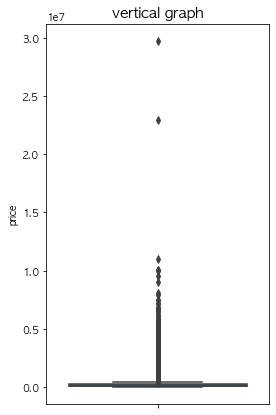

In [116]:
# boxplot 세로 그래프
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'price', data = user_monetary)
plt.title('vertical graph', size = 15)
plt.show()

**소수 유저의 구매 금액이 이상치 급으로 큰 것을 확인**

In [117]:
#4 Quantile
num = user_monetary['price']
Q1 = num.quantile(.25)
Q3 = num.quantile(.75)
IQR = Q3 - Q1
Q2 = num.quantile(.5)
Q4 = num.quantile(1)

print('Q1: ', Q1)
print('Q2: ', Q2)
print('Q3: ', Q3)
print('Q4: ', Q4)

Q1:  49000.0
Q2:  100499.5
Q3:  216500.0
Q4:  29726100.0


In [125]:
# percentile
num_m = user_monetary['price']

for i in range(1,10):
    globals()['p{}'.format(i)] = np.percentile(num_m, i*10,  interpolation = 'nearest')

In [126]:
user_monetary['monetary'] = ""

In [127]:
def quantile(x):
    if x > Q3 :
        return 4
    
    elif x > Q2 :
        return 3
    
    elif x > Q1 :
        return 2
    
    else:
        return 1

In [128]:
user_monetary['monetary'] = user_monetary['price'].apply(quantile)

In [129]:
user_monetary['monetary'].value_counts(normalize = True)

1   0.26
3   0.25
4   0.25
2   0.24
Name: monetary, dtype: float64

In [ ]:
#10분위

# def monetary(x):
#     if x > P9 :
#         return 10
    
#     elif x > P8 :
#         return 9
    
#     elif x > P7 :
#         return 8
    
#     elif x > P6 :
#         return 7
    
#     elif x > P5 :
#         return 6
    
#     elif x > P4 :
#         return 5
    
#     elif x > P3 :
#         return 4
    
#     elif x > P2 :
#         return 3
    
#     elif x > P1 :
#         return 2
#     else:
#         return 1

In [130]:
user_monetary['monetary'] = user_monetary['price'].apply(monetary)

NameError: name 'monetary' is not defined

In [131]:
user_monetary.head()

user_no     price  monetary
0  +++T9c17sr6wEYOy9UFv3w== 274500.00         4
1  +++aQH5NnhiU/9qECKk3uQ== 163000.00         3
2  ++0bwiYVJ/TAsCpxI4UCuw==  88000.00         2
3  ++1HN9s1imztN8ftPCt3LA==  16800.00         1
4  ++2StXdzG0Bj/Kkb5EFcog==  25900.00         1

In [132]:
#점수 별 수
user_monetary['monetary'].value_counts()

1    37794
3    36730
4    36722
2    35658
Name: monetary, dtype: int64

## RFM 분석 - Frequency

In [134]:
#구매 빈도 구하기
#구매한 고객 user_no, session_id 가져오기
user_frequency = df[df['event_name']=='purchase_success'][['user_no', 'session_id']]
user_frequency.drop_duplicates(['session_id'], inplace = True)

In [135]:
user_frequency = user_frequency.groupby('user_no')['session_id'].count().reset_index()


In [136]:
#구매 빈도
user_frequency['session_id'].value_counts().sort_index()

1     96029
2     27029
3     11030
4      5546
5      2891
6      1642
7       987
8       590
9       359
10      248
11      134
12      101
13       68
14       56
15       36
16       34
17       18
18       21
19       16
20        8
21        9
22        6
23        4
24        7
25        6
26        4
27        3
29        2
30        2
31        2
32        3
33        1
34        3
35        1
38        1
40        1
41        1
42        1
54        1
69        1
90        1
99        1
Name: session_id, dtype: int64

In [137]:
user_frequency['frequency'] = ""

In [138]:
user_frequency.head()

user_no  session_id frequency
0  +++T9c17sr6wEYOy9UFv3w==           4          
1  +++aQH5NnhiU/9qECKk3uQ==           2          
2  ++0bwiYVJ/TAsCpxI4UCuw==           1          
3  ++1HN9s1imztN8ftPCt3LA==           1          
4  ++2StXdzG0Bj/Kkb5EFcog==           1

In [139]:
def frequency(x):
    if x == 1 :
        return 1
    
    elif x <= 3 :
        return 2
    
    elif x<= 7 :
        return 3
    
    else:
        return 4

In [140]:
user_frequency['frequency'] = user_frequency['session_id'].apply(frequency)

In [ ]:
user_frequency['frequency'].value_counts()

## RFM 분석 - Recency

In [141]:
user_recency = df[df['event_name']=='purchase_success'][['session_id', 'user_no', 'event_timestamp', 'event_name']]

In [142]:
user_recency1 = user_recency.groupby('user_no')['session_id'].count().reset_index()

In [143]:
user_recency = pd.merge(user_recency, user_recency1, how = 'inner', on = 'user_no')

In [144]:
user_recency.columns=['session_id', 'user_no', 'event_timestamp', 'event_name', 'session_count']

In [145]:
user_recency.set_index('user_no', inplace = True)

In [146]:
user_recency['event_timestamp'] = user_recency['event_timestamp'].dt.strftime('%y/%m/%d')

In [147]:
user_recency.head()

session_id event_timestamp  \
user_no                                                                      
l1wFRhb3av5rTWyYEofrIA==  cddf65caad5fe0da36ceaeaf6ecc7d45        22/07/21   
l1wFRhb3av5rTWyYEofrIA==  cddf65caad5fe0da36ceaeaf6ecc7d45        22/07/21   
Y5GM63HPuFwrRnvYhDu7sQ==  16e708ee91a1bd7beb297bf6bad1ddaa        05/06/21   
Y5GM63HPuFwrRnvYhDu7sQ==  16e708ee91a1bd7beb297bf6bad1ddaa        05/06/21   
Y5GM63HPuFwrRnvYhDu7sQ==  62f88dca0928240cc90b285198b43f73        10/06/21   

                                event_name  session_count  
user_no                                                    
l1wFRhb3av5rTWyYEofrIA==  purchase_success              2  
l1wFRhb3av5rTWyYEofrIA==  purchase_success              2  
Y5GM63HPuFwrRnvYhDu7sQ==  purchase_success              8  
Y5GM63HPuFwrRnvYhDu7sQ==  purchase_success              8  
Y5GM63HPuFwrRnvYhDu7sQ==  purchase_success              8

In [148]:
user_recency = user_recency.groupby('user_no')['event_timestamp'].max().reset_index()

In [149]:
user_recency

user_no event_timestamp
0       +++T9c17sr6wEYOy9UFv3w==        17/06/21
1       +++aQH5NnhiU/9qECKk3uQ==        21/06/21
2       ++0bwiYVJ/TAsCpxI4UCuw==        27/07/21
3       ++1HN9s1imztN8ftPCt3LA==        10/06/21
4       ++2StXdzG0Bj/Kkb5EFcog==        29/06/21
...                          ...             ...
146899  zzrBh62TO71nt1GQm+jMjA==        27/07/21
146900  zzuJMnncH5Wrn/GUA7nqTg==        23/07/21
146901  zzwYai1YDr0JZQwaTqc0mQ==        04/07/21
146902  zzwxh/ZL9TPJOWZHLMvnDQ==        30/06/21
146903  zzzWx+6Z3L2IRJBTgvBs5g==        15/06/21

[146904 rows x 2 columns]

In [ ]:
# user_recency = pd.merge(user1, user_recency, how = 'inner', on = 'user_no')

In [ ]:
# user_recency

In [ ]:
# user_recency.columns = ['user_no', 'session_id', 'event_timestamp', 'event_name', 'session_count', 'event_max']

In [150]:
user_recency['recency'] = ""

In [152]:
#일자 표시 변환
user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'], yearfirst = True).dt.strftime('%y/%m/%d')


#datetime 변환
user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'], yearfirst = True)



In [ ]:
# #일자 표시 변환
# user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'], yearfirst = True).dt.strftime('%y/%m/%d')
# user_recency['event_max'] = pd.to_datetime(user_recency['event_max'], yearfirst = True).dt.strftime('%y/%m/%d')

# #datetime 변환
# user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'], yearfirst = True)
# user_recency['event_max'] = pd.to_datetime(user_recency['event_max'], yearfirst = True)


In [ ]:
# user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'])
# user_recency['event_max'] = pd.to_datetime(user_recency['event_max'])

In [153]:
user_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146904 entries, 0 to 146903
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   user_no          146904 non-null  object        
 1   event_timestamp  146904 non-null  datetime64[ns]
 2   recency          146904 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 3.4+ MB


In [154]:
# 비교 날짜
date_compare = pd.datetime.strptime("20210804", "%Y%m%d")
user_recency['date_compare'] = date_compare
user_recency['recency'] = (date_compare - user_recency['event_timestamp'])

In [155]:
#timedelta 를 int로
user_recency['recency'] = user_recency['recency'].dt.days

In [156]:
#필요없는 컬럼 날리기
user_recency.drop(columns = ['date_compare'], inplace = True)
user_recency.head()

user_no event_timestamp  recency
0  +++T9c17sr6wEYOy9UFv3w==      2017-06-21     1505
1  +++aQH5NnhiU/9qECKk3uQ==      2021-06-21       44
2  ++0bwiYVJ/TAsCpxI4UCuw==      2027-07-21    -2177
3  ++1HN9s1imztN8ftPCt3LA==      2010-06-21     4062
4  ++2StXdzG0Bj/Kkb5EFcog==      2029-06-21    -2878

In [157]:
user_recency

user_no event_timestamp  recency
0       +++T9c17sr6wEYOy9UFv3w==      2017-06-21     1505
1       +++aQH5NnhiU/9qECKk3uQ==      2021-06-21       44
2       ++0bwiYVJ/TAsCpxI4UCuw==      2027-07-21    -2177
3       ++1HN9s1imztN8ftPCt3LA==      2010-06-21     4062
4       ++2StXdzG0Bj/Kkb5EFcog==      2029-06-21    -2878
...                          ...             ...      ...
146899  zzrBh62TO71nt1GQm+jMjA==      2027-07-21    -2177
146900  zzuJMnncH5Wrn/GUA7nqTg==      2023-07-21     -716
146901  zzwYai1YDr0JZQwaTqc0mQ==      2004-07-21     6223
146902  zzwxh/ZL9TPJOWZHLMvnDQ==      2030-06-21    -3243
146903  zzzWx+6Z3L2IRJBTgvBs5g==      2015-06-21     2236

[146904 rows x 3 columns]

In [158]:
#4 Quantile
num = user_recency['recency']
Q1 = num.quantile(.25)
Q3 = num.quantile(.75)
IQR = Q3 - Q1
Q2 = num.quantile(.5)
Q4 = num.quantile(1)

print('Q1: ', Q1)
print('Q2: ', Q2)
print('Q3: ', Q3)
print('Q4: ', Q4)

Q1:  -1417.0
Q2:  1140.0
Q3:  4397.0
Q4:  7319.0


In [159]:
# percentile
num_r = user_recency['recency']
for i in range(1,10):
    globals()['p{}'.format(i)] = np.percentile(num_r, i*10,  interpolation = 'nearest')


In [160]:
user_recency['recency_score'] = ""

In [161]:
def recency2(x):
    if x < P1 :
        return 10
    
    elif x < P2 :
        return 9
    
    elif x < P3 :
        return 8
    
    elif x < P4 :
        return 7
    
    elif x < P5 :
        return 6
    
    elif x < P6 :
        return 5
    
    elif x < P7 :
        return 4
    
    elif x < P8 :
        return 3
    
    elif x < P9 :
        return 2
    else:
        return 1

In [162]:
user_recency['recency_score'] = user_recency['recency'].apply(recency2)

In [ ]:
# #recency 를 10분위로 점수 부여
# for i in range(0, len(user_recency['recency'])):
#     if user_recency['recency'][i] > P9 :
#         user_recency['recency_score'][i] = 1
#     elif user_recency['recency'][i] > P8 :
#         user_recency['recency_score'][i] = 2
#     elif user_recency['recency'][i] > P7 :
#         user_recency['recency_score'][i] = 3
#     elif user_recency['recency'][i] > P6 :
#         user_recency['recency_score'][i] = 4
#     elif user_recency['recency'][i] > P5 :
#         user_recency['recency_score'][i] = 5
#     elif user_recency['recency'][i] > P4 :
#         user_recency['recency_score'][i] = 6
#     elif user_recency['recency'][i] > P3 :
#         user_recency['recency_score'][i] = 7
#     elif user_recency['recency'][i] > P2 :
#         user_recency['recency_score'][i] = 8
#     elif user_recency['recency'][i] > P1 :
#         user_recency['recency_score'][i] = 9
#     else:
#         user_recency['recency_score'][i] = 10

In [163]:
def recency(x):
    if x > Q3 :
        return 1
    elif x > Q2 :
        return 2
    elif x > Q1 :
        return 3
    else :
        return 4

In [164]:
user_recency['recency_score'] = user_recency['recency'].apply(recency)

In [165]:
user_recency['recency_score'].value_counts()

4    38782
1    36504
3    35943
2    35675
Name: recency_score, dtype: int64

## RFM 합산


In [ ]:
# user_monetary, user_frequency, user_recency

In [ ]:
user_monetary['monetary']

In [ ]:
user_frequency['frequency']

In [ ]:
user_recency['recency_score']

In [166]:
#RFM 을 위한 데이터 통합
from functools import reduce

dfs = [user_monetary, user_frequency, user_recency]
RFM = reduce(lambda left, right: pd.merge(left, right, on='user_no'), dfs)


In [167]:
RFM = RFM[['user_no', 'monetary','frequency', 'recency_score']].drop_duplicates()

In [ ]:
# RFM = pd.read_csv('/Users/greedy/Downloads/프로그래밍/FastCampus_29cm_FinalProject/RFM.csv')
# RFM.drop(columns = 'Unnamed: 0', inplace = True)

### RFM 기준 고객 세그먼트

if [RFM | Recency Score] >= 9 and ([RFM | Frequency Score]*2.5) >= 9 and [RFM | Monetary Score] >= 9 then 'VVIP 고객'

elseif [RFM | Recency Score] >= 6 and ([RFM | Frequency Score]*2.5) >= 6 and [RFM | Monetary Score] >= 7 then 'VIP 고객'

elseif [RFM | Recency Score] <= 3 and ([RFM | Frequency Score]*2.5) >= 7 and [RFM | Monetary Score] >= 7 then '놓치면 안 될 고객'

elseif [RFM | Recency Score] <= 3 and ([RFM | Frequency Score]*2.5) >= 6 and [RFM | Monetary Score] >= 5 then '이탈 우려 고객'

elseif [RFM | Recency Score] >= 7 and ([RFM | Frequency Score]*2.5) <= 4 and [RFM | Monetary Score] >= 5 then '우량 가망 신규 고객'

elseif [RFM | Recency Score] <= 3 and ([RFM | Frequency Score]*2.5) <= 3 and [RFM | Monetary Score] <= 3 then '저수익성 고객'

elseif [RFM | Recency Score] >= 5 and ([RFM | Frequency Score]*2.5) >= 5 and [RFM | Monetary Score] >= 5 then '우수 일반 고객'

else '일반 고객'
END

In [ ]:
# 파일화
# RFM.to_csv('RFM.csv')

In [170]:
RFM[['monetary', 'recency_score', 'frequency']] = RFM[['monetary', 'recency_score', 'frequency']].apply(pd.to_numeric, errors = 'coerce')

In [171]:
RFM['segment'] = ""

In [172]:
RFM

user_no  monetary  frequency  recency_score segment
0       +++T9c17sr6wEYOy9UFv3w==         4          3              2        
1       +++aQH5NnhiU/9qECKk3uQ==         3          2              3        
2       ++0bwiYVJ/TAsCpxI4UCuw==         2          1              4        
3       ++1HN9s1imztN8ftPCt3LA==         1          1              2        
4       ++2StXdzG0Bj/Kkb5EFcog==         1          1              4        
...                          ...       ...        ...            ...     ...
146899  zzrBh62TO71nt1GQm+jMjA==         3          1              4        
146900  zzuJMnncH5Wrn/GUA7nqTg==         2          1              3        
146901  zzwYai1YDr0JZQwaTqc0mQ==         2          1              1        
146902  zzwxh/ZL9TPJOWZHLMvnDQ==         3          1              4        
146903  zzzWx+6Z3L2IRJBTgvBs5g==         4          2              2        

[146904 rows x 5 columns]

In [ ]:
# def RFM_func(RFM):
#     if ((RFM['recency_score'] >= 9) & (RFM['frequency'] >= 9) & (RFM['monetary'] >= 9)):
#         return 'VVIP 고객'
#     elif (RFM['recency_score'] >= 6) & (RFM['frequency'] >= 6) & (RFM['monetary'] >= 7):
#         return 'VIP 고객'
#     elif (RFM['recency_score'] <= 3) & (RFM['frequency'] >= 7) & (RFM['monetary'] >= 7):
#         return '놓치면 안 될 고객'
#     elif (RFM['recency_score'] <= 3) & (RFM['frequency'] >= 6) & (RFM['monetary'] >= 5):
#         return '이탈 우려 고객'
#     elif (RFM['recency_score'] >= 7) & (RFM['frequency'] <= 4) & (RFM['monetary'] >= 5):
#         return '우량 가망 신규 고객'
#     elif (RFM['recency_score'] <= 3) & (RFM['frequency'] <= 3) & (RFM['monetary'] <= 3):
#         return '저수익성 고객'
#     elif (RFM['recency_score'] >= 5) & (RFM['frequency'] >= 5) & (RFM['monetary'] >= 5):
#         return '우수 일반 고객'
#     else :
#         return '일반 고객'

In [ ]:
# 8 분류
RFM.loc[:,'segment'] = '일반 고객'
RFM.loc[(RFM['recency_score'] <= 3) & (RFM['frequency'] <= 3) & (RFM['monetary'] <= 3), 'segment'] = '저수익성 고객'
RFM.loc[(RFM['recency_score'] >= 7) & (RFM['frequency'] <= 4) & (RFM['monetary'] >= 5), 'segment'] = '우량 가망 신규 고객'
RFM.loc[(RFM['recency_score'] <= 3) & (RFM['frequency'] >= 6) & (RFM['monetary'] >= 5), 'segment'] = '이탈 우려 고객'
RFM.loc[(RFM['recency_score'] <= 3) & (RFM['frequency'] >= 7) & (RFM['monetary'] >= 7), 'segment'] = '놓치면 안 될 고객' 
RFM.loc[(RFM['recency_score'] >= 5) & (RFM['frequency'] >= 5) & (RFM['monetary'] >= 5), 'segment'] = '우수 일반 고객'
RFM.loc[(RFM['recency_score'] >= 6) & (RFM['frequency'] >= 6) & (RFM['monetary'] >= 7), 'segment'] = 'VIP 고객'
RFM.loc[(RFM['recency_score'] >= 9) & (RFM['frequency'] >= 9) & (RFM['monetary'] >= 9), 'segment'] = 'VVIP 고객'

In [ ]:
# 4분류
RFM.loc[:,'segment'] = '일반 고객'
RFM.loc[(RFM['recency_score'] <= 3) & (RFM['frequency'] <= 3) & (RFM['monetary'] <= 3), 'segment'] = '저수익성 고객'
RFM.loc[(RFM['recency_score'] >= 7) & (RFM['frequency'] <= 4) & (RFM['monetary'] >= 5), 'segment'] = '우량 가망 신규 고객' 
RFM.loc[(RFM['recency_score'] >= 5) & (RFM['frequency'] >= 5) & (RFM['monetary'] >= 5), 'segment'] = '우수 일반 고객'
RFM.loc[(RFM['recency_score'] >= 6) & (RFM['frequency'] >= 6) & (RFM['monetary'] >= 7), 'segment'] = 'VIP 고객'

In [ ]:
RFM['segment'].value_counts(normalize=True)

In [ ]:
RFM['segment'].value_counts()

In [ ]:
RFM.drop(columns = 'Unnamed: 0')

## 구매 전환율

In [ ]:
#event에서 purchase 의 비율

def cvr(pop) :
    #pop은 원하는 df
    sample = pop[pop['event_name']=='purchase_success']
    if len(pop) == 0 :
        print(pop, '의 숫자가 0입니다.')
    else :
        print( "%0.2f%%" % (len(sample)/len(pop)*100))
    return (len(sample)/len(pop)*100)

In [ ]:
cvr(F)

In [ ]:
# 성별 
F = df[df['gender']=='F']
print('여성 : '), cvr(F)

M = df[df['gender']=='M']
print('남성 : '), cvr(M)

print('전체 : '), cvr(df)

# None

In [ ]:
#카테고리 별
def cvr_col(col):
    #col은 컬럼
    arr1 = df['col'].unique()
    for i in arr1:
        print(i, ':')
        i = df[df['col']==i]
        cvr(i), print('\n')
        return cvr(i)

In [ ]:
df['category1_name'].unique()

In [ ]:
for i in df['category1_name'].unique():
    print(i, ':')
    i = df[df['category1_name']==i]
    cvr(i), print('\n')

In [ ]:
RFM['recency_score'].value_counts()

In [ ]:
RFM['monetary'].value_counts()

In [ ]:
RFM['frequency'].value_counts(normalize = True)